In [166]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime,date
import warnings
warnings.filterwarnings('ignore')

Importing datasets


In [167]:
#reading ds
df = pd.read_csv('C:\\Users\\lohit\\Downloads\\insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [168]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [169]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#EDA


In [170]:
#dimensions of dataset
df.shape

(1338, 7)

In [171]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [172]:
# checking datatypes of col's
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [173]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [174]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [175]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [176]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [177]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

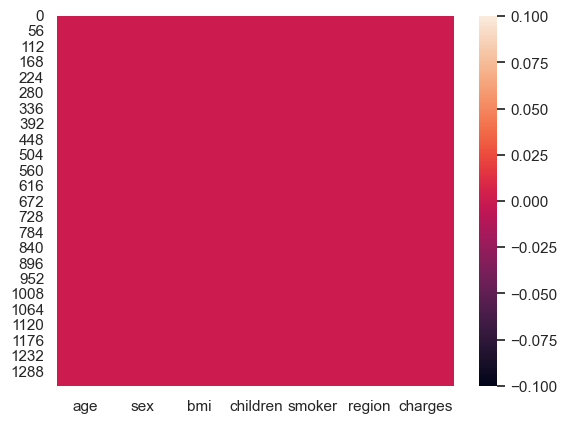

In [179]:
#visualize it by headmap
sb.heatmap(df.isnull())

In [180]:
#count values of each col's
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [181]:
#seperating numerical and categorical col's
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical cols: ",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical-col: ",numerical_col)

Categorical cols:  ['sex', 'smoker', 'region']
Numerical-col:  ['age', 'bmi', 'children', 'charges']


In [182]:
#checking no of unique in each col
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [183]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


-- Checking duplicates in df

In [184]:
print("total duplicates rows",df.duplicated().sum())

total duplicates rows 1


In [185]:
#visualize the data


sex
male      676
female    662
Name: count, dtype: int64


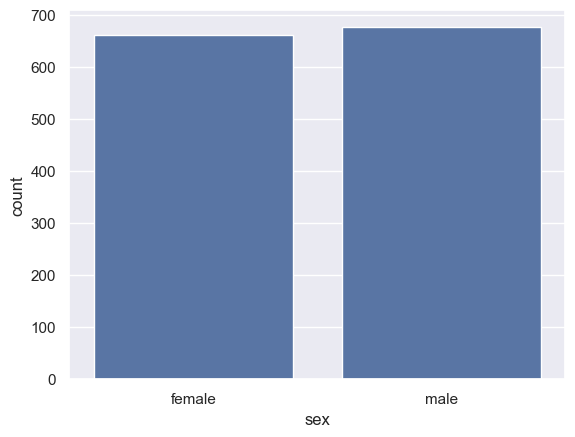

In [186]:
#visualize  the number of people
ax=sb.countplot(x='sex',data=df)
print(df['sex'].value_counts())

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


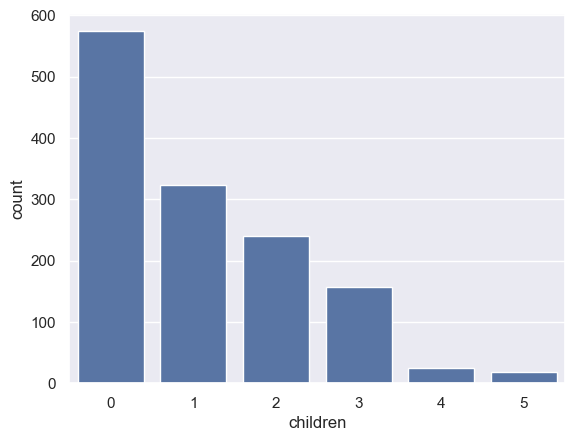

In [187]:
#visualize the no of children
ax=sb.countplot(x='children',data=df)
print(df['children'].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


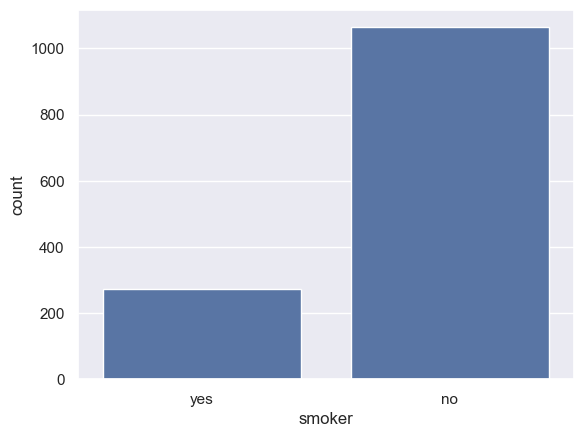

In [188]:
#visualize the no of smoker
ax=sb.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


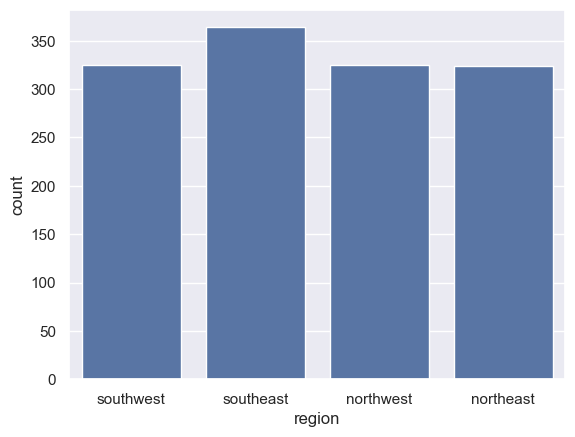

In [189]:
#visualize the no of region
ax=sb.countplot(x='region',data=df)
print(df['region'].value_counts())

In [190]:
#check the max and min quantity rate
print("Min charges taken from insurance:",df.charges.min())
print("Max charges taken from insurance:" ,df["charges"].max())

Min charges taken from insurance: 1121.8739
Max charges taken from insurance: 63770.42801


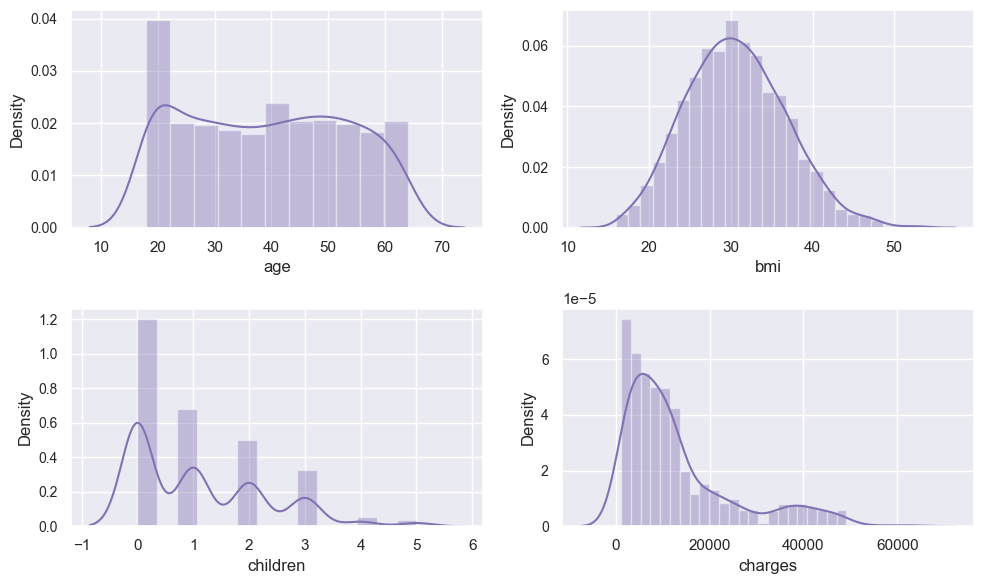

In [191]:
#check how the data has been distributes in remaining col

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    ax=plt.subplot(2,2,plotnumber)
    sb.distplot(df[col],color="m")
    plt.xlabel(col,fontsize=12)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Relational Analysis


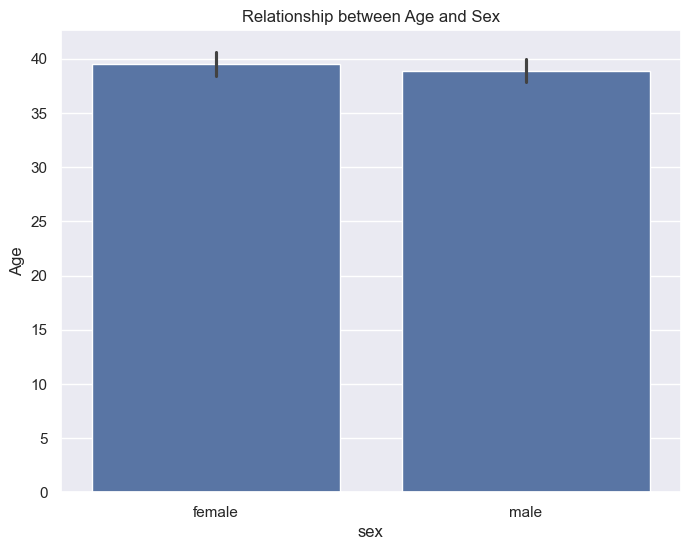

In [192]:
plt.figure(figsize=(8,6))
#create the bar plot
sb.barplot(x="sex", y="age", data=df)
#set labels and title
plt.xlabel("sex")
plt.ylabel("Age")
plt.title("Relationship between Age and Sex")
plt.show()

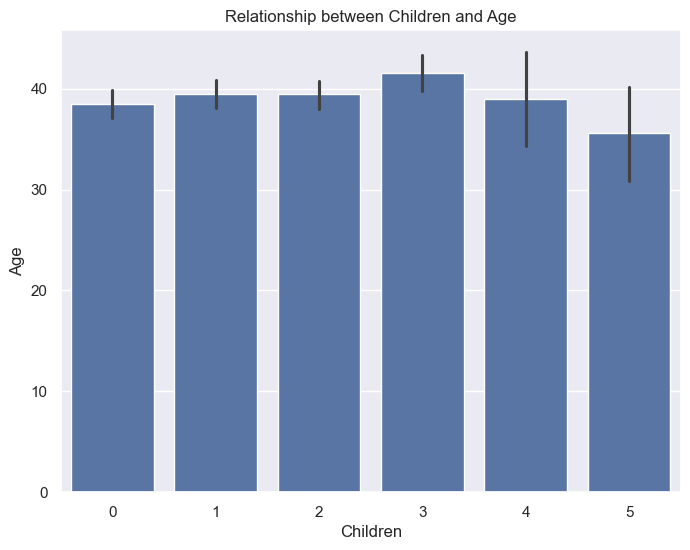

In [193]:
plt.figure(figsize=(8,6))
#create the bar plot
sb.barplot(x="children", y="age", data=df)
#set labels and title
plt.xlabel("Children")
plt.ylabel("Age")
plt.title("Relationship between Children and Age")
plt.show()

Check for outliers

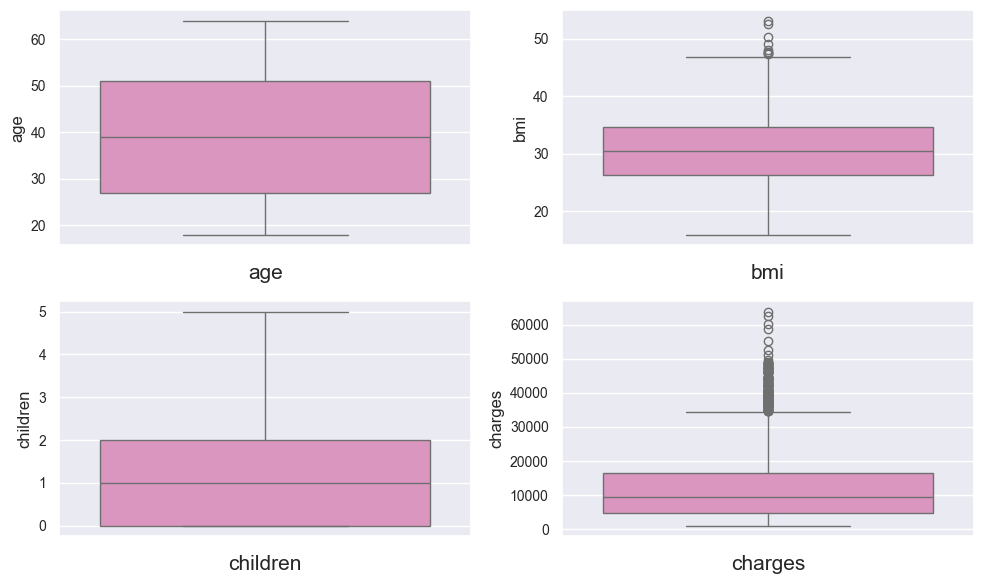

In [194]:
#using boxplot check outliers
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sb.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnumber+=1
plt.tight_layout()

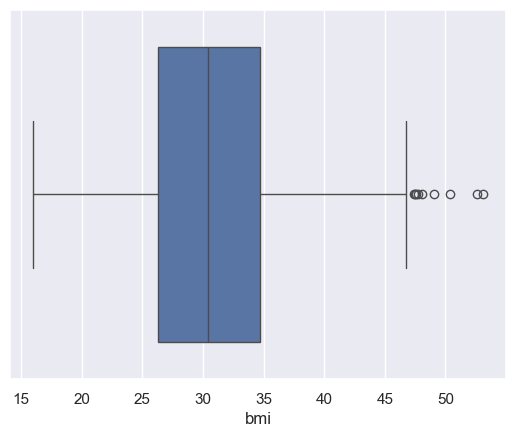

In [195]:
#checking outliers for bmi using boxplot
sb.boxplot(x=df['bmi'])
plt.show()

Using IQR methods to remove outliers

In [196]:
#calculate IQR
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#identify outliers
outliers=df.loc[(df['bmi']<lower_bound) | (df['bmi'] > upper_bound)]

#Remove outliers
df1=df.loc[(df['bmi']>=lower_bound) & (df['bmi'] <= upper_bound)]

#print cleared df
print('dataframe after removing ouliers')
print(df1)

print("removed ouliers")
print(outliers)



dataframe after removing ouliers
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]
removed ouliers
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11

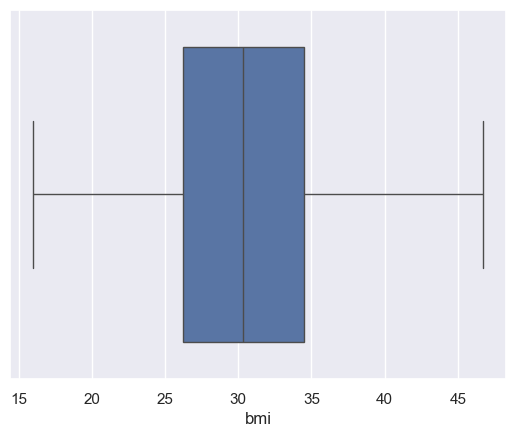

In [197]:
#checking outliers for age
#checking outliers for bmi using boxplot
sb.boxplot(x=df1['bmi'])
plt.show()

In [198]:
#new dataframe id df1
print("Old df: ",df.shape[0])
print("New df: ",df1.shape[0])

Old df:  1338
New df:  1329


In [199]:
#calcualte the dataloss
data_loss=df1.shape[0]-df.shape[0],df1.shape[1]-df.shape[1]
print("data_loss",data_loss)

data_loss (-9, 0)


In [200]:
print("Data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss  0.672645739910314


In [226]:
df1['sex'] = df1['sex'].apply({'male':0, 'female':1}.get)
df1['smoker'] = df1['smoker'].apply({'yes':1, 'no':0}.get)
df1['region'] = df1['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [227]:
df1.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [228]:
X = df1.drop(['charges',], axis=1)
y = df1.charges

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (930, 6)
X_test shape:  (399, 6)
y_train shape:  (930,)
y_test shape:  (399,)


In [230]:
linear_reg = LinearRegression()

In [231]:
linear_reg.fit(X_train, y_train)
pred = linear_reg.predict(X_test)

In [237]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [238]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7716630723497742


In [239]:
print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
print("Mean squared error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute error:  3861.7942577658087
Mean squared error:  31215384.67065288
Root Mean Squared Error :  5587.0729967177695


In [240]:
data = {'age':50, 'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [236]:
cost_pred = linear_reg.predict(cust_df)
print(f"The medical insurance cost of the new customer is: {cost_pred[0]:.2f}")

The medical insurance cost of the new customer is: 33068.07
